In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

#Read from CSV file
data = pd.read_csv(r"C:\Users\jowen\Desktop\College\Graduate courses\Research\skeLCS\Iris\iris.csv")

#Specify the dataset's phenotype label
classLabel = "class"

#Derive the attribute and phenotype array using the phenotype label
dataFeatures = data.drop(classLabel,axis = 1).values

r=len(dataFeatures)
dataFeatures=dataFeatures[:r-1]

dataPhenotypes = data[classLabel].values
dataPhenotypes= dataPhenotypes[:r-1]

dataFeatures_train, dataFeatures_test, dataPhenotypes_train, dataPhenotypes_test = train_test_split(dataFeatures, dataPhenotypes, stratify=dataPhenotypes, random_state=1)

DataPhenotypes_train=LabelBinarizer().fit_transform(dataPhenotypes_train)
DataPhenotypes_test=LabelBinarizer().fit_transform(dataPhenotypes_test)

#Optional: Retrieve the headers for each attribute as a length n array
dataHeaders = data.drop(classLabel,axis=1).columns.values

print("Data Features")
print(dataFeatures)
print("\nData test Features")
print(dataFeatures_test)
print("\nData train Features")
print(dataFeatures_train)

print("\nData Phenotypes")
print(dataPhenotypes)
print("\nData test Phenotypes array")
print(DataPhenotypes_test)
print("\nData train Phenotypes array")
print(DataPhenotypes_train)

print("\nData Headers")
print(dataHeaders)

Data Features
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5

In [2]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=3)
TrainedModel=model.fit(dataFeatures_train,DataPhenotypes_train)

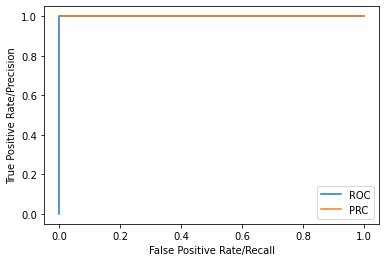

PRC AUC:1.0
ROC AUC:1.0


In [3]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt

probs = TrainedModel.predict_proba(dataFeatures_test)
probs1=probs[0]

fpr1, tpr1, thresholds1 = roc_curve(DataPhenotypes_test[:,0], probs1[:, 1])
prec1, recall1, thresholds1 = precision_recall_curve(DataPhenotypes_test[:,0], probs1[:,1])

plt.plot(fpr1,tpr1,label="ROC")
plt.plot(recall1,prec1,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.show()

print("PRC AUC:" + str(auc(recall1, prec1)))
print("ROC AUC:" + str(auc(fpr1, tpr1)))

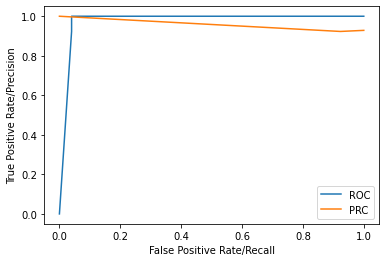

PRC AUC:0.9587912087912088
ROC AUC:0.9784615384615385


In [4]:
probs2=probs[1]

fpr2, tpr2, thresholds2 = roc_curve(DataPhenotypes_test[:,1], probs2[:, 1])
prec2, recall2, thresholds2 = precision_recall_curve(DataPhenotypes_test[:,1], probs2[:, 1])

plt.plot(fpr2,tpr2,label="ROC")
plt.plot(recall2,prec2,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.show()

print("PRC AUC:" + str(auc(recall2, prec2)))
print("ROC AUC:" + str(auc(fpr2, tpr2)))

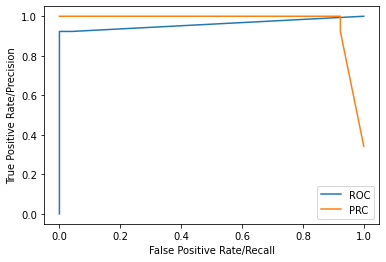

PRC AUC:0.9717377763936468
ROC AUC:0.96


In [5]:
probs3=probs[2]

fpr3, tpr3, thresholds3 = roc_curve(DataPhenotypes_test[:,2], probs3[:, 1])
prec3, recall3, thresholds3 = precision_recall_curve(DataPhenotypes_test[:,2], probs3[:, 1])

plt.plot(fpr3,tpr3,label="ROC")
plt.plot(recall3,prec3,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.show()

print("PRC AUC:" + str(auc(recall3, prec3)))
print("ROC AUC:" + str(auc(fpr3, tpr3)))

<ipython-input-15-2ec612509de4>:17: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


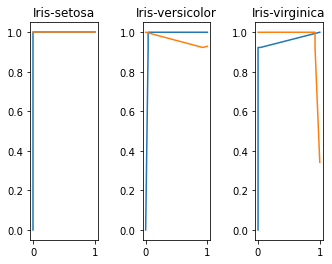

In [15]:
plot1=plt.subplot2grid((1,24),(0,0), colspan=5)
plot2=plt.subplot2grid((1,24),(0,8), colspan=5)
plot3=plt.subplot2grid((1,24),(0,16), colspan=5)

plot1.set_title('Iris-setosa')
plot1.plot(fpr1,tpr1,label="ROC")
plot1.plot(recall1,prec1,label="PRC")

plot2.set_title('Iris-versicolor')
plot2.plot(fpr2,tpr2,label="ROC")
plot2.plot(recall2,prec2,label="PRC")

plot3.set_title('Iris-virginica')
plot3.plot(fpr3,tpr3,label="ROC")
plot3.plot(recall3,prec3,label="PRC")

plt.tight_layout()
plt.show()